# Analiza glavnih komponenti

U ovoj svesci ćemo prikazati kako priprema podataka i izbor ulazne matrice utiču na rezultate analize glavnih komponenti. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import decomposition

In [3]:
import sys

Skup podataka sa kojim ćemo raditi je istovetan sa skupom podataka uvedenim u prethodnoj svesci tj. sadrži podatke o tumorima dojke. Na raspolaganju su vrednosti 30 različitih atributa među kojima su opis teksture tumora, njegove kompaktnosti, površine, glatkosti, simetrije, itd. Informacija je dostupna za 569 pacijenata. Uz opise tumora, prisutna je i informacija o tome da li je tumor benigan ili maligan. 

Skup podataka se može učitati pozivom `load_breast_cancer()` iz `sklearn.datasets` paketa. 

In [4]:
data = datasets.load_breast_cancer()

Instance sa kojima radimo ćemo čuvati u matrici `X`. Kolone ove matrice predstavljaju vrednosti pojedinačnih atributa.

In [5]:
X = data.data
number_of_features = data.data.shape[1]

In [6]:
print('Broj atributa: ', number_of_features)

Broj atributa:  30


Obeležja koja su pridružena instancama ćemo čuvati na nivou vektora `y`. Vrednost `0` označava maligni tumor, a vrednost `1` benigni. 

In [7]:
y = data.target
number_of_classes = np.unique(y).shape[0]

In [8]:
print('Broj klasa: ', number_of_classes)

Broj klasa:  2


Više o atributima skupa možemo pročitati ispisivanjem detaljnog opisa `print(data.DESCR)`.

In [9]:
# print(data.DESCR)

Funkcija `transform_dataset` objedinjuje korake opisane u prethodnoj svesci uz mogućnost kontrole pripremnog koraka standardizacije podataka (parametar `preprocessing`) i izbora ulazne matrice (parametar `matrix`) tako da to može da bude ili matrica kovarijanse ili matrica korelacije.

Podsetimo se, matrica korelacije takođe oslikava povezanost dveju slučajnih veličina i to na način koji ne zavisi od dimenzija posmatranih veličina. Ako su $\sigma_i$ i $\sigma_j$ standardne devijacije slučanih veličina $X_i$ i $X_j$, koeficijent korelacije $corr(X_i, X_j)$ je definisan izrazom $$corr(X_i, X_j) = \frac{cov(X_i, X_j)}{\sigma_i \sigma_j}$$ u kojem $cov(X_i, X_j)$ označava kovarijansu veličina $X_i$ i $X_j$.

In [10]:
def transform_dataset(X, k, preprocessing=True, matrix='covariance'):
    
    # priprema podataka
    if preprocessing:
        X_mean = X.mean(axis=0)
        X_std = X.std(axis=0)
        X = (X-X_mean)/X_std
    
    # kreiranje ulazne matrice
    supported_matrix = ['covariance', 'correlation']
    assert (matrix in supported_matrix), 'Nije podrzan navedeni tip matrice!'
    
    if matrix == 'covariance':
        input_matrix = np.cov(X.T)
    else:
        input_matrix = np.corrcoef(X.T)
      
    # dalji koraci algoritma
    
    eig_values, eig_vectors = np.linalg.eig(input_matrix)
    
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(0, len(eig_values))]
    eig_pairs.sort()
    eig_pairs.reverse()
    
    
    transformation_matrix = np.empty((number_of_features, k))
    for i in range(0, k):
        transformation_matrix[:, i] = eig_pairs[i][1] 

    X_transformed = transformation_matrix.T.dot(X.T).T
    
    return X_transformed

Funkcija `show_2D_dataset` prikazuje polazni skup sveden na prostor dimenzije 2. 

In [11]:
def show_2D_dataset(X, y, title):
    colors = ['red' if v == 0 else 'blue' for v in y]
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.title(title)
    plt.show()

Nadalje slede prikazi transformisanog skupa za različite pozive funkcije `transform_dataset`.

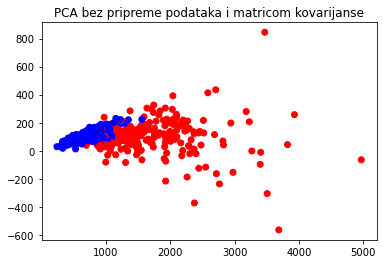

In [12]:
show_2D_dataset(transform_dataset(X, 2, preprocessing=False, matrix='covariance'), y, 'PCA bez pripreme podataka i matricom kovarijanse')

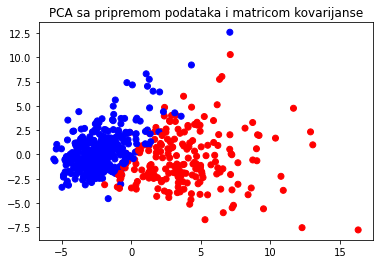

In [13]:
show_2D_dataset(transform_dataset(X, 2, preprocessing=True, matrix='covariance'), y, 'PCA sa pripremom podataka i matricom kovarijanse')

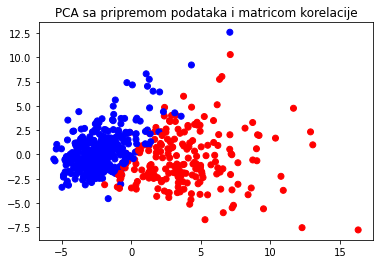

In [14]:
show_2D_dataset(transform_dataset(X, 2, preprocessing=True, matrix='correlation'), y, 'PCA sa pripremom podataka i matricom korelacije')

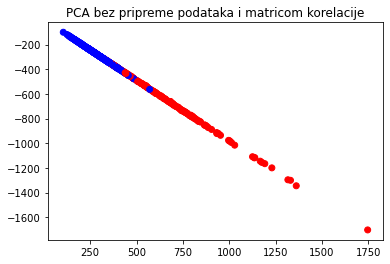

In [15]:
show_2D_dataset(transform_dataset(X, 2, preprocessing=False, matrix='correlation'), y, 'PCA bez pripreme podataka i matricom korelacije')

Ukoliko su podaci standardizovani, određivanje sopstvenih vrednosti i sopstvenih vektora matrice kovarijanse je istovetno sa određivanjem sopstvenih vrednosti i sopstvenih vektora matrice korelacija jer se matrica korelacija može posmatrati i kao normalizovana matrica kovarijanse.

Prilikom redukcije dimenzionalnosti često se postavlja pitanje izbora broja glavnih komponenti koje treba zadržati. U praksi se ovaj broj određuje tako da bude zadovoljen neki kreterijum u vezi sa dozvoljenim gubitkom informacija. U prethodnoj svesci smo videli da se korišćenjem svojstva `pca.explained_variance_ratio_` u kombinaciji sa funkcijom `np.sum` može dobiti informacija o udelu objašnjene varijanse. Ukoliko se funkciji `decomposition.PCA` kao vrednost argumenta `n_components` prosledi broj između 0 i 1, on će se protumatiči kao udeo objašnjene varijanse koji treba zadovoljiti redukcijom dimenzionalnosti pa će metoda izračunati broj potrebnih komponenti.

Na primer, sledeći fragment koda ukazuje da je potrebno 5 glavnih komponenti da bi ukupno objašnjena varijansa bila barem 80%.

In [16]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
pca = decomposition.PCA(n_components=0.8)
pca.fit(X)
X_transformed = pca.transform(X)

In [18]:
X_transformed.shape

(569, 5)